In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
pd.set_option('display.max_columns', 32)

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.shape

(119390, 32)

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Check for null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### 4 columns have null values 

In [7]:
## filling null values with zero
df.fillna(0, inplace = True)

<AxesSubplot:>

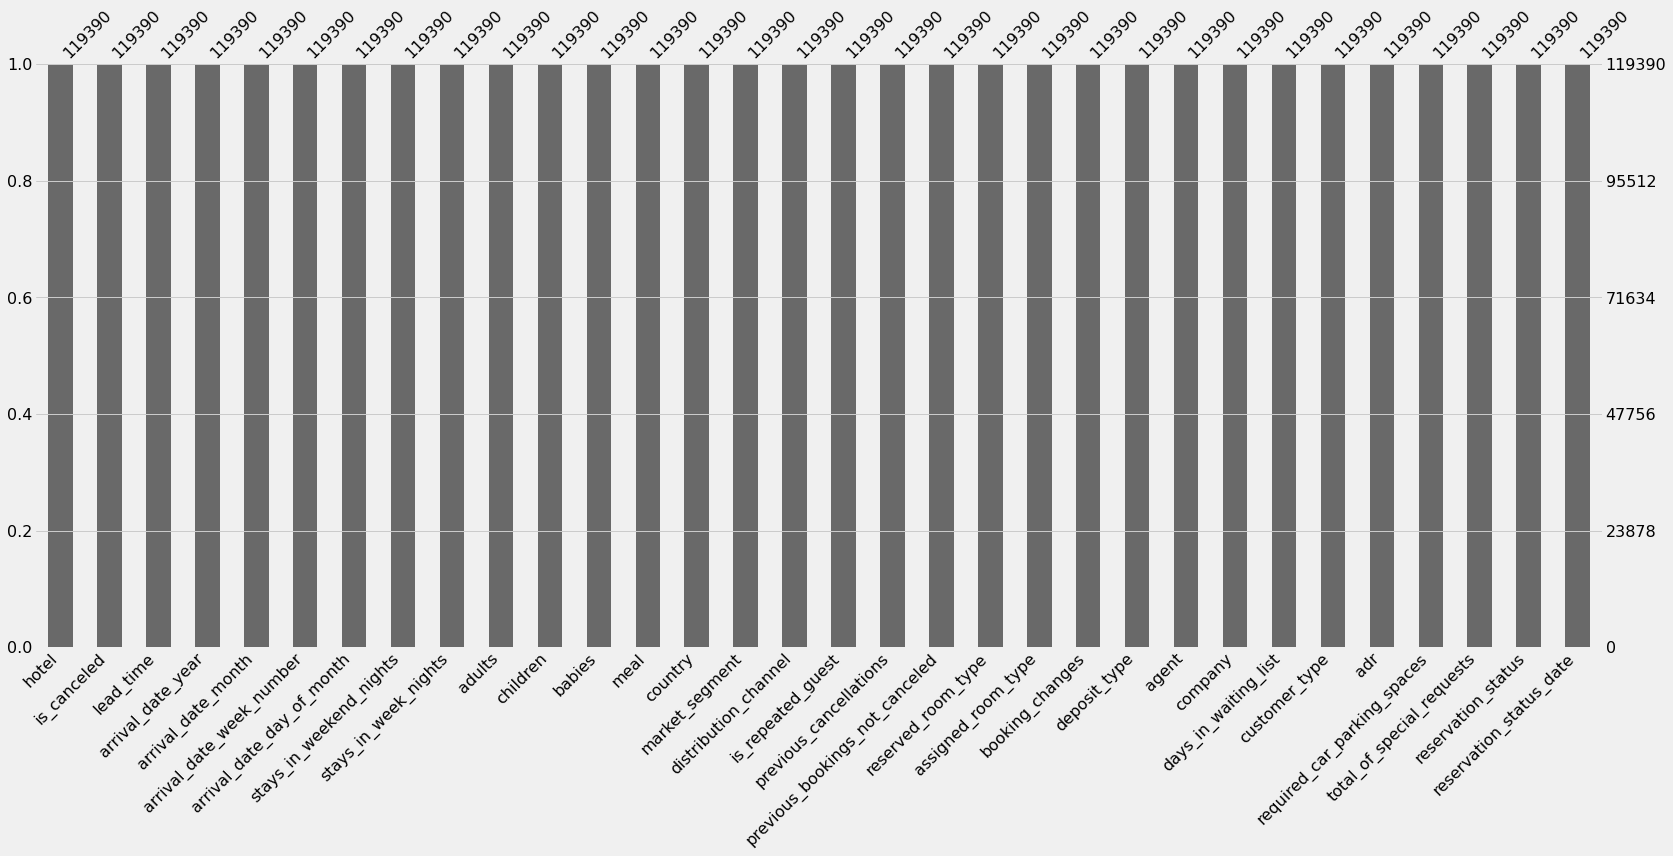

In [8]:
## use to view the missing value in the data frame 
msno.bar(df)

In [9]:
#### adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [10]:
# here we are only keeping those records where the aduslts, babies and chidlern are not null or zero
df = df[~filter]

## Dropping useless columns 

<AxesSubplot:>

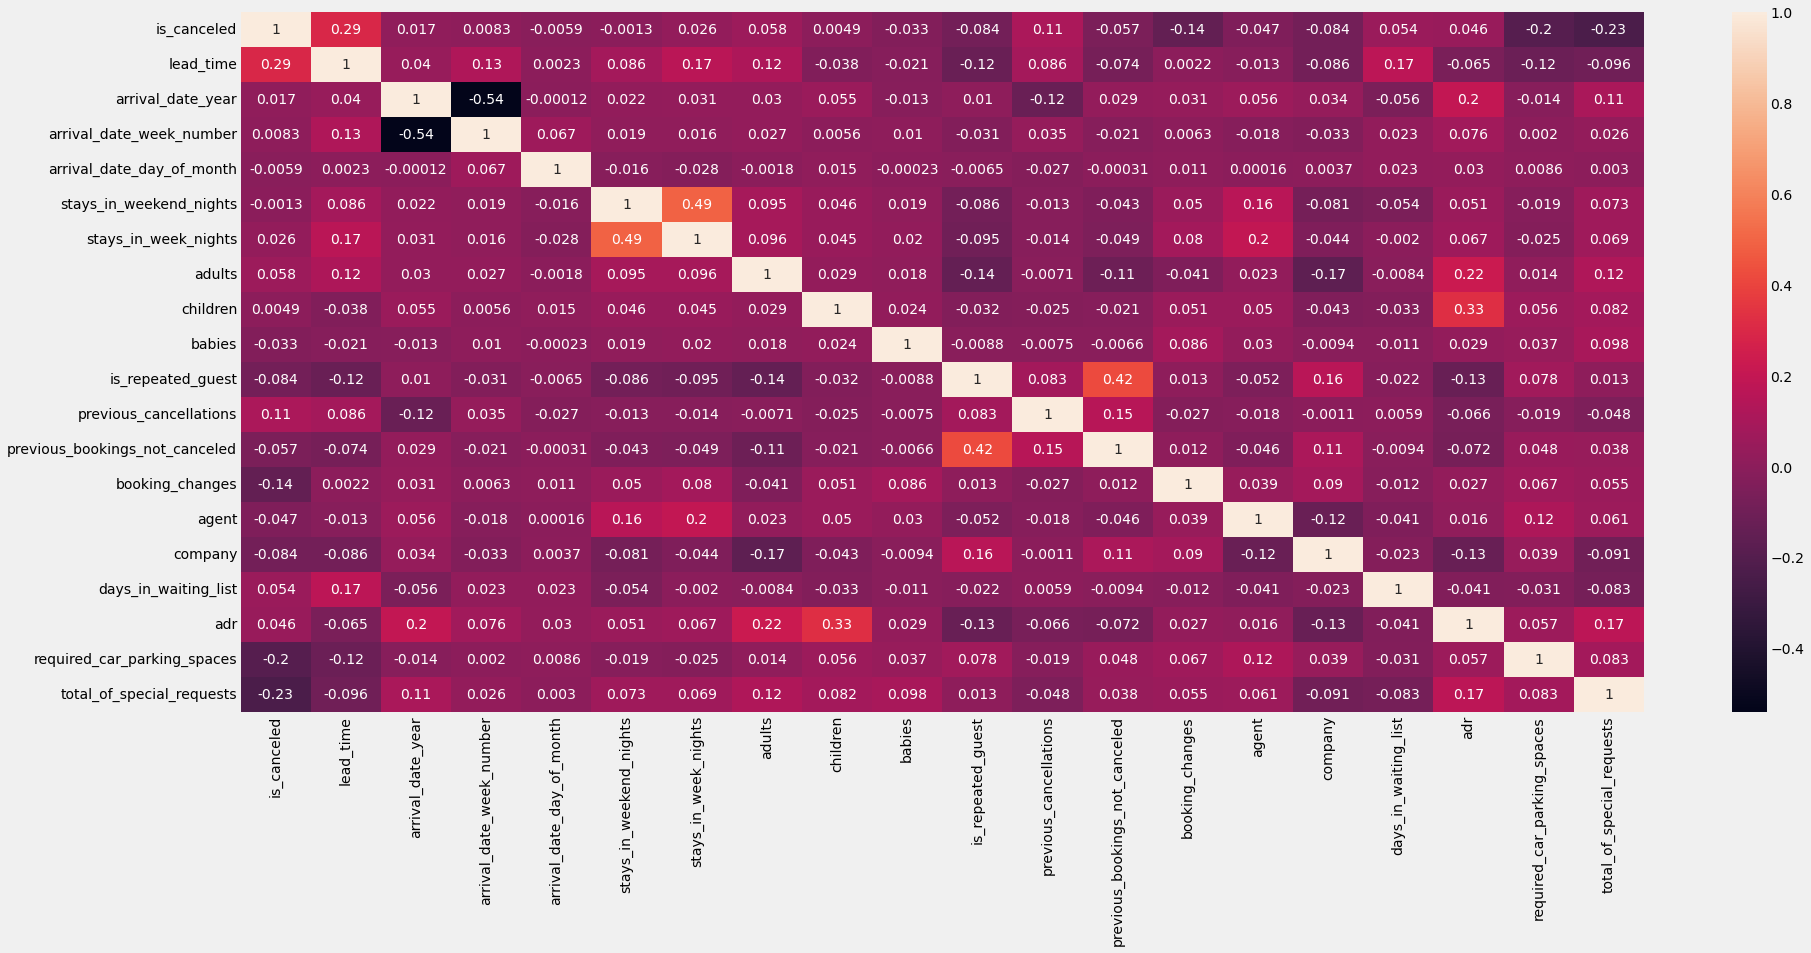

In [11]:
plt.figure(figsize=(28,12))
cor = df.corr()
sns.heatmap(cor, annot = True)

In [12]:
df.corr()['is_canceled'].abs().sort_values()

stays_in_weekend_nights           0.001323
children                          0.004851
arrival_date_day_of_month         0.005948
arrival_date_week_number          0.008315
arrival_date_year                 0.016622
stays_in_week_nights              0.025542
babies                            0.032569
adr                               0.046492
agent                             0.046770
days_in_waiting_list              0.054301
previous_bookings_not_canceled    0.057365
adults                            0.058182
company                           0.083594
is_repeated_guest                 0.083745
previous_cancellations            0.110139
booking_changes                   0.144832
required_car_parking_spaces       0.195701
total_of_special_requests         0.234877
lead_time                         0.292876
is_canceled                       1.000000
Name: is_canceled, dtype: float64

In [13]:
# dropping columns that are not useful

useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df.drop(useless_col, axis = 1, inplace = True)

## Categorical variables 

In [14]:
 cat_col = [ col  for col in df.columns if df[col].dtype == 'O']

In [15]:
cat_col

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [16]:
df[cat_col]

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03
...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,2017-09-06
119386,City Hotel,August,BB,Online TA,TA/TO,E,No Deposit,Transient,2017-09-07
119387,City Hotel,August,BB,Online TA,TA/TO,D,No Deposit,Transient,2017-09-07
119388,City Hotel,August,BB,Online TA,TA/TO,A,No Deposit,Transient,2017-09-07


## Let's print the unique values out of it 

In [17]:
for col in cat_col:
    print(col, ":", len(df[col].unique()))

hotel : 2
arrival_date_month : 12
meal : 5
market_segment : 8
distribution_channel : 5
reserved_room_type : 9
deposit_type : 3
customer_type : 4
reservation_status_date : 926


## let's check the reservation_status_date columns 

In [18]:
df['reservation_status_date']

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 119210, dtype: object

In [19]:
### these are dates but let's convert them into the year, month and date seperately
df['Year'] = df['reservation_status_date'].str.split('-').str[0]
df['Month'] = df['reservation_status_date'].str.split('-').str[1]
df['Date'] = df['reservation_status_date'].str.split('-').str[2]

In [20]:
df.drop(['arrival_date_month','reservation_status_date'], axis = 1, inplace = True)

In [21]:
df['Date'] = df['Date'].astype('int')
df['Month'] = df['Month'].astype('int')
df['Year'] = df['Year'].astype('int')

## Encoding of Categorical values 

In [22]:
## let's perform one hot encoding 
cat_col = [ col  for col in df.columns if df[col].dtype == 'O']
for col in cat_col:
    df1 = pd.get_dummies(df[col], drop_first=True)
    pd.concat([df,df1], axis = 1)

In [23]:
df.drop(cat_col, axis = 1, inplace = True)

In [24]:
df

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests,Year,Month,Date
0,0,342,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0,2015,7,1
1,0,737,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0,2015,7,1
2,0,7,27,1,0,1,1,0.0,0,0,0,0,0.0,0.0,75.00,0,0,2015,7,2
3,0,13,27,1,0,1,1,0.0,0,0,0,0,304.0,0.0,75.00,0,0,2015,7,2
4,0,14,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,98.00,0,1,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,35,30,2,5,2,0.0,0,0,0,0,394.0,0.0,96.14,0,0,2017,9,6
119386,0,102,35,31,2,5,3,0.0,0,0,0,0,9.0,0.0,225.43,0,2,2017,9,7
119387,0,34,35,31,2,5,2,0.0,0,0,0,0,9.0,0.0,157.71,0,4,2017,9,7
119388,0,109,35,31,2,5,2,0.0,0,0,0,0,89.0,0.0,104.40,0,0,2017,9,7


# Feature Scaling  

In [25]:
x = df.drop('is_canceled', axis = 1)
y = df['is_canceled']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=1 )

In [27]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()

In [28]:
x_scale_train = sd.fit_transform(x_train)
x_scale_test = sd.transform(x_test)

<a id = '4.5'></a>
<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong> Gradient Boosting Classifier</strong></p> 

### We will pass the decision tree as our base estimator 

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [30]:
gbc = GradientBoostingClassifier()
gbc.fit(x_scale_train,y_train)

GradientBoostingClassifier()

In [31]:
predict = gbc.predict(x_scale_test)

In [32]:
accuracy_score(y_test,predict)

0.8986941811369292

## Let's Try Logistic regression 

In [33]:
from sklearn.linear_model import LogisticRegression
lr  = LogisticRegression()
lr.fit(x_scale_train,y_train)
predict = lr.predict(x_scale_test)
accuracy_score(y_test,predict)

0.7417442608282303